In [97]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
import scipy.signal as signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [98]:
def load_data(path):
    return pd.read_csv(path)

In [99]:
power = "2hp_"
fault_type = "normal_"
bearing_type = "DE"
rpm = "1796"
extention = ".csv"

read_name = power + fault_type + rpm + extention
fft_out = power + fault_type + rpm + bearing_type + "_fft.png"
sfft_out = power + fault_type + rpm + bearing_type + "_sfft.png"

In [100]:
path = "..\Bearing Vibration Image\data_set_48k_csv\\" + read_name
current_data = load_data(path)


In [101]:
data = current_data["X099_DE_time"].values

In [102]:
data.shape

(485063,)

# SCIPY try

#### FFT

In [103]:
window_size = 8192
sampling_rate = 48000
time_increment = sampling_rate / window_size
no_sample = data.shape[0]

print(time_increment)

5.859375


In [104]:
np.arange(no_sample)

array([     0,      1,      2, ..., 485060, 485061, 485062])

In [105]:
x = np.arange(no_sample) * time_increment

In [106]:
x

array([0.00000000e+00, 5.85937500e+00, 1.17187500e+01, ...,
       2.84214844e+06, 2.84215430e+06, 2.84216016e+06])

In [107]:
y = fft(data)

In [108]:
y = abs(y)

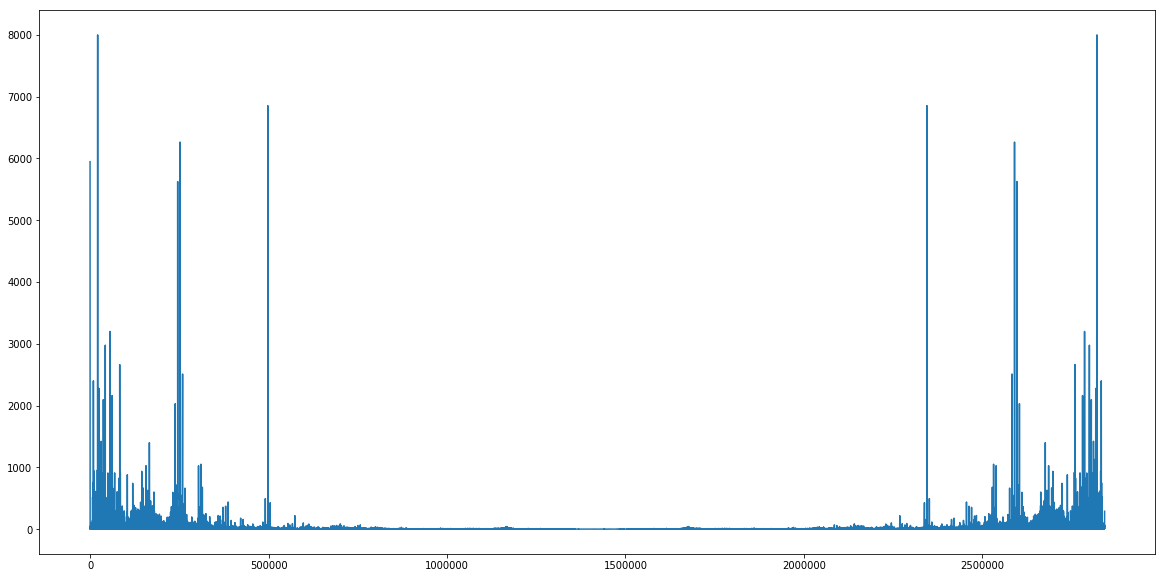

In [109]:
fig = plt.figure(figsize=(20,10))
plt.plot(x,y)
#plt.gca().invert_yaxis()

plt.show()

#### STFT

In [110]:
fs = 48000
window_size = 2048
f, t, Zxx = signal.stft(data, fs, nperseg = window_size)
# overlap if its none, by default is nperseg//2
# f = Array of sample frequencies. (frequency increment)
# t = Array of segment times. (length of a frame in sec / 2 -> i guess its because of nyquist theorem)
# Zxx = STFT of x. By default, the last axis of Zxx corresponds to the segment times.

In [111]:
print(f[:100] , f.shape) 

[   0.       23.4375   46.875    70.3125   93.75    117.1875  140.625
  164.0625  187.5     210.9375  234.375   257.8125  281.25    304.6875
  328.125   351.5625  375.      398.4375  421.875   445.3125  468.75
  492.1875  515.625   539.0625  562.5     585.9375  609.375   632.8125
  656.25    679.6875  703.125   726.5625  750.      773.4375  796.875
  820.3125  843.75    867.1875  890.625   914.0625  937.5     960.9375
  984.375  1007.8125 1031.25   1054.6875 1078.125  1101.5625 1125.
 1148.4375 1171.875  1195.3125 1218.75   1242.1875 1265.625  1289.0625
 1312.5    1335.9375 1359.375  1382.8125 1406.25   1429.6875 1453.125
 1476.5625 1500.     1523.4375 1546.875  1570.3125 1593.75   1617.1875
 1640.625  1664.0625 1687.5    1710.9375 1734.375  1757.8125 1781.25
 1804.6875 1828.125  1851.5625 1875.     1898.4375 1921.875  1945.3125
 1968.75   1992.1875 2015.625  2039.0625 2062.5    2085.9375 2109.375
 2132.8125 2156.25   2179.6875 2203.125  2226.5625 2250.     2273.4375
 2296.875  2320.31

In [112]:
print(t[:100] , t.shape)

[0.         0.02133333 0.04266667 0.064      0.08533333 0.10666667
 0.128      0.14933333 0.17066667 0.192      0.21333333 0.23466667
 0.256      0.27733333 0.29866667 0.32       0.34133333 0.36266667
 0.384      0.40533333 0.42666667 0.448      0.46933333 0.49066667
 0.512      0.53333333 0.55466667 0.576      0.59733333 0.61866667
 0.64       0.66133333 0.68266667 0.704      0.72533333 0.74666667
 0.768      0.78933333 0.81066667 0.832      0.85333333 0.87466667
 0.896      0.91733333 0.93866667 0.96       0.98133333 1.00266667
 1.024      1.04533333 1.06666667 1.088      1.10933333 1.13066667
 1.152      1.17333333 1.19466667 1.216      1.23733333 1.25866667
 1.28       1.30133333 1.32266667 1.344      1.36533333 1.38666667
 1.408      1.42933333 1.45066667 1.472      1.49333333 1.51466667
 1.536      1.55733333 1.57866667 1.6        1.62133333 1.64266667
 1.664      1.68533333 1.70666667 1.728      1.74933333 1.77066667
 1.792      1.81333333 1.83466667 1.856      1.87733333 1.8986

In [113]:
print(Zxx[:100] , Zxx.shape)

[[ 7.30496563e-03+0.00000000e+00j  1.41324507e-02+0.00000000e+00j
   1.39510355e-02+0.00000000e+00j ...  1.21864140e-02+0.00000000e+00j
   1.29031488e-02+0.00000000e+00j  3.25646727e-03+0.00000000e+00j]
 [-3.72621553e-03+4.49363599e-03j -7.02474825e-03-1.12923962e-04j
  -6.94675202e-03-6.51475724e-05j ... -6.00073573e-03+3.52088125e-04j
  -6.73588636e-03-1.08549492e-04j -3.36304367e-04-2.91118230e-03j]
 [ 2.88568493e-04-2.96824656e-03j -1.54763094e-04+3.10575263e-04j
  -3.22598196e-04-4.37081751e-05j ... -1.48004669e-04-1.12876097e-04j
  -8.58049433e-05-2.24458264e-04j -1.98920821e-03+7.13694377e-04j]
 ...
 [ 6.03368654e-04+7.70972553e-05j  5.22341996e-04+5.25912063e-08j
  -1.54391690e-03+2.43336701e-05j ... -4.80333625e-04+6.21997751e-04j
   1.60688279e-04+5.86888488e-04j -2.94892316e-05-4.99539415e-04j]
 [-7.08103443e-04+6.73637025e-04j -9.14184853e-04-7.18320314e-04j
   9.56260088e-04-5.88494135e-04j ...  7.57737094e-05+4.07350293e-04j
  -7.82568485e-04+3.15389703e-04j -6.29845138e-

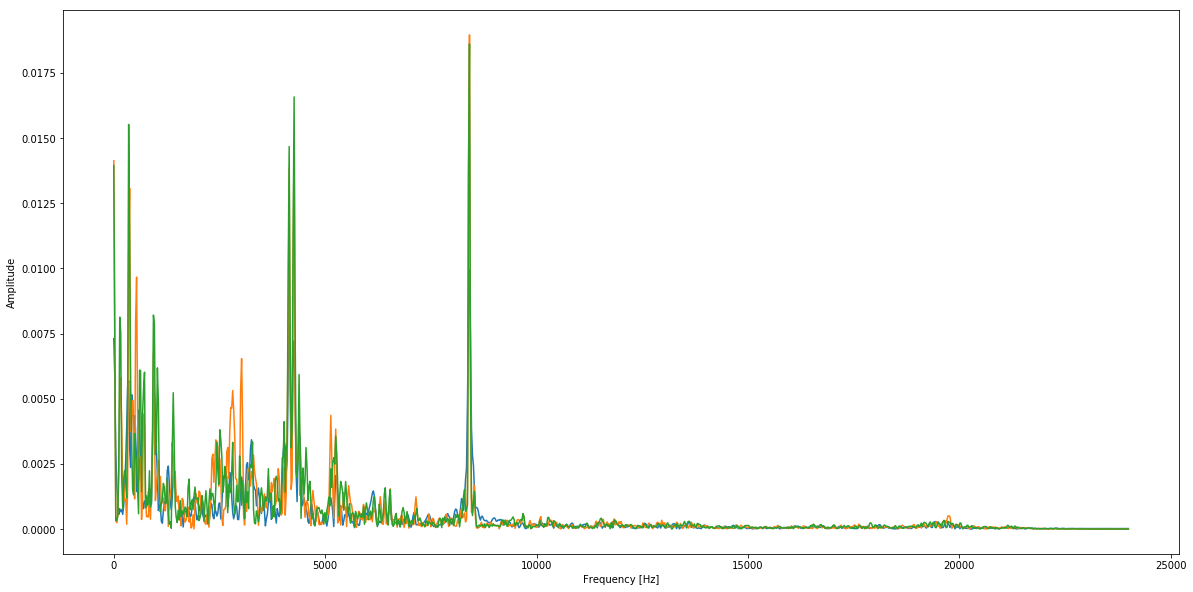

In [114]:
#2d plot
#%matplotlib qt
fig = plt.figure(figsize=(20,10))
plt.plot( f, np.abs(Zxx[: ,:3]))
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.savefig(fft_out)

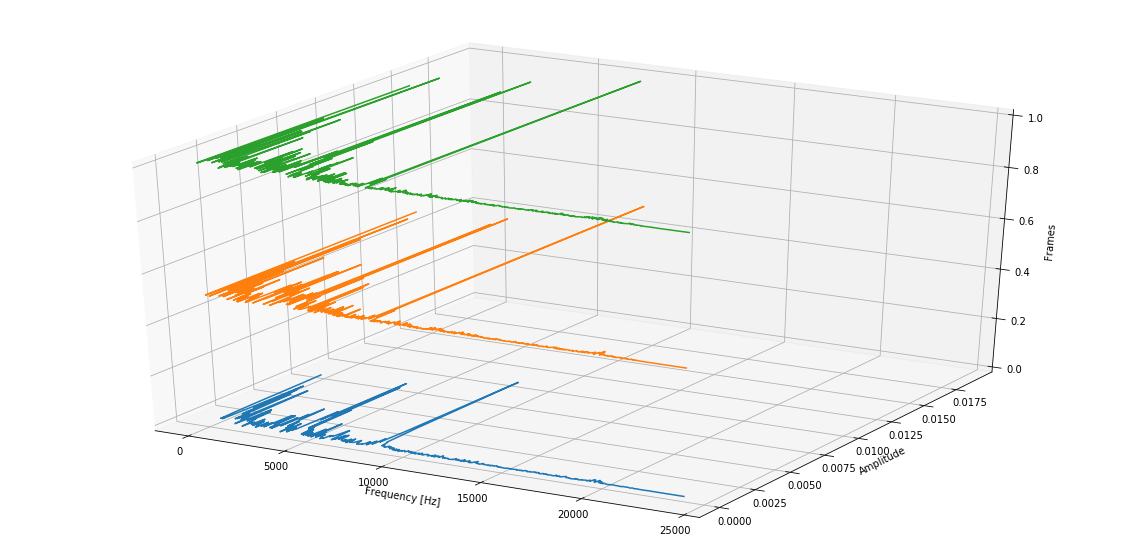

In [115]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
#ax.invert_yaxis()
limit = Zxx.shape[1]//2
limit = 3
for frameNo in range(0,limit):
    frame = np.abs(Zxx[:,frameNo])
    ax.plot(f,frame , frameNo/2)
     
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.set_zlabel('Frames')
#ax.invert_xaxis()
plt.show()

# Librosa


#### STFT

In [116]:
from librosa import stft

In [117]:
librosa_fs = 48000
librosa_window_size = 4096
librosa_overlap = 1024    
librosa_time_increment = librosa_fs /librosa_window_size


In [118]:
librosa_time_increment

11.71875

In [119]:
x_freq_increment = np.arange(1025) * librosa_time_increment

In [120]:
x_freq_increment

array([0.00000000e+00, 1.17187500e+01, 2.34375000e+01, ...,
       1.19765625e+04, 1.19882812e+04, 1.20000000e+04])

In [121]:
X_libs = stft(data, n_fft = window_size, hop_length=1024)
X_libs = np.abs(X_libs)  #from complex to real

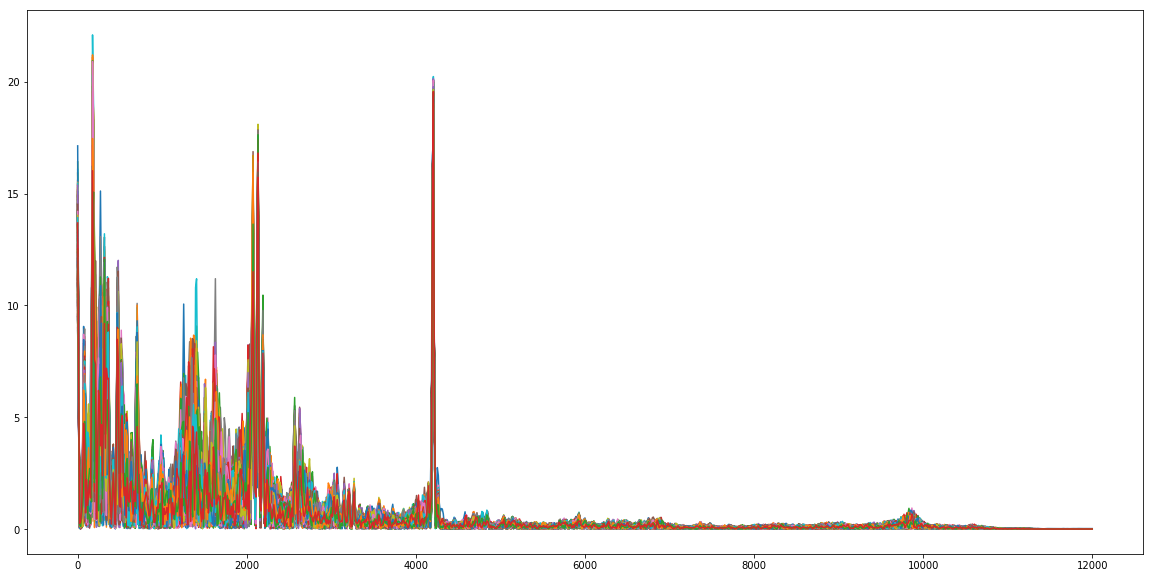

In [122]:
#%matplotlib qt
fig = plt.figure(figsize=(20,10))
plt.plot(x_freq_increment,X_libs)
#plt.gca().invert_yaxis()
plt.savefig(sfft_out)

In [123]:
X_libs.max()

22.092838

In [124]:
np.unravel_index(X_libs.argmax(), X_libs.shape)

# !!!! first index is frequency

(15, 119)

In [125]:
X_libs[354].max()

2.12261

In [126]:
for frameNo in range(0, X_libs.shape[1] - 1):
    print(f"Frame no {frameNo}: max amplitude and its frequency ({int(X_libs[:,frameNo].max())},{X_libs[:,frameNo].argmax()})")
        

Frame no 0: max amplitude and its frequency (17,359)
Frame no 1: max amplitude and its frequency (19,359)
Frame no 2: max amplitude and its frequency (19,359)
Frame no 3: max amplitude and its frequency (19,359)
Frame no 4: max amplitude and its frequency (19,359)
Frame no 5: max amplitude and its frequency (19,359)
Frame no 6: max amplitude and its frequency (20,359)
Frame no 7: max amplitude and its frequency (19,359)
Frame no 8: max amplitude and its frequency (19,359)
Frame no 9: max amplitude and its frequency (19,359)
Frame no 10: max amplitude and its frequency (19,359)
Frame no 11: max amplitude and its frequency (19,15)
Frame no 12: max amplitude and its frequency (19,359)
Frame no 13: max amplitude and its frequency (19,359)
Frame no 14: max amplitude and its frequency (19,359)
Frame no 15: max amplitude and its frequency (19,359)
Frame no 16: max amplitude and its frequency (19,359)
Frame no 17: max amplitude and its frequency (19,359)
Frame no 18: max amplitude and its freq

In [127]:
np.unravel_index(X_libs[:,0].argmax(), X_libs.shape)

(0, 359)

In [128]:
X_libs[:,0].argmax()

359